In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!sudo apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt



Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 8 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu

In [0]:
#INITIAL SETUP
def initialSetup(initialNodes):
  randomSample = random.sample(G.nodes(), initialNodes)
  return list(randomSample)

In [0]:
#COLOR THE INFECTED NODES(green)

def displayColoredGraph(infected):
  cmap=[]
  for node in G:
    if node in infected:
      cmap.append('green')
    else:
      cmap.append('blue')

  nx.draw(G, pos,node_color=cmap, node_size=40)
  plt.show()
  

In [0]:
def howManyInfected(nodes,infected):
  countI=0
  for node in nodes:
    #Evaluate how many infected neighbors the node has 
    if node in infected:
      countI+=1
  return countI


def iterateContagion(infected):
  infected2=infected.copy()
  for nodeI in infected:
    #For one infected node
    neighbors= list(G.neighbors(nodeI))
    for nodeS in neighbors:
      #Evaluate one neighbor from the infected node for contagion
      if nodeS in infected2:
        continue
      #If not already infected, we evaluate
      neighborsS=list(G.neighbors(nodeS))
      total=len(neighborsS)
      countI=howManyInfected(neighborsS,infected)
      if countI/total >threshold:
        infected2.append(nodeS)
  return infected2

  

##Working with synthetic graph

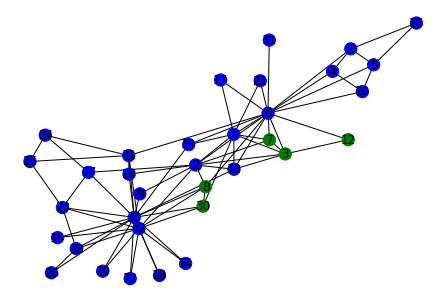

Number of infected nodes:  5


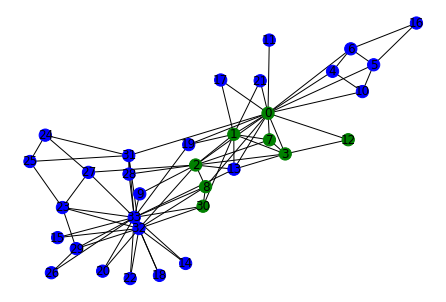

Number of infected nodes:  8


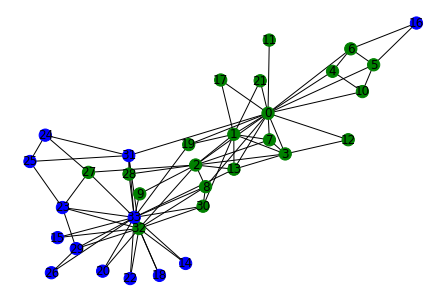

Number of infected nodes:  21


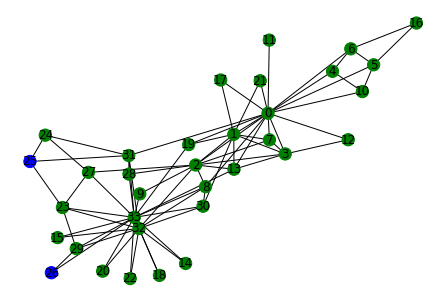

Number of infected nodes:  32


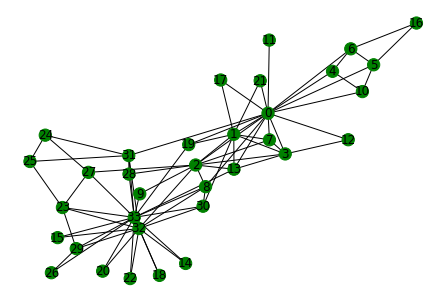

Number of infected nodes:  34


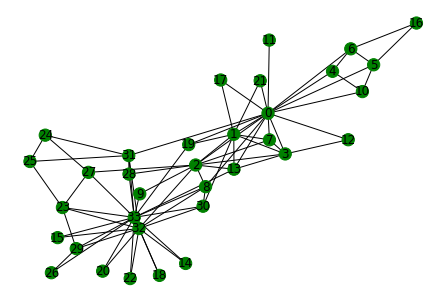

Number of infected nodes:  34


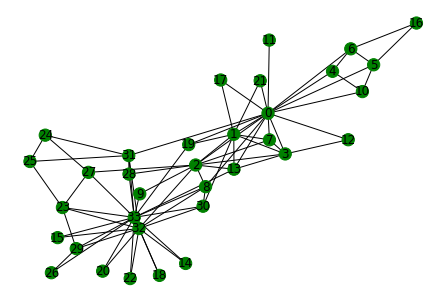

Number of infected nodes:  34


In [0]:
import matplotlib.pyplot as plt
import random

G=nx.karate_club_graph()
G= max(nx.connected_component_subgraphs(G), key=len)
pos = nx.spring_layout(G, iterations=1000)
threshold=0.2

infected=initialSetup(2) #argument: number of initially infected nodes
for it in range(7):
  infected=iterateContagion(infected)
  displayColoredGraph(infected)
  print("Number of infected nodes: ", len(infected))
  

##Working with real graph

###Loading real graph and libraries

In [0]:
import pickle

with open ('/content/drive/My Drive/graphPickle', 'rb') as fp:
    playersGraph = pickle.load(fp)

In [0]:
import matplotlib.pyplot as plt
import random

G=playersGraph
G= max(nx.connected_component_subgraphs(G), key=len)
#pos = nx.spring_layout(G, iterations=50)  #instead of executing this, load the pickle of the pos already saved 2 cells below

###Loading and saving pickle for pos of graph

In [0]:
#with open('/content/drive/My Drive/pos_pickle', 'wb') as fp:
 #   pickle.dump(pos, fp)

In [11]:
import pickle
with open ('/content/drive/My Drive/pos_pickle', 'rb') as fp:
    pos = pickle.load(fp)

EOFError: ignored

###Simulation

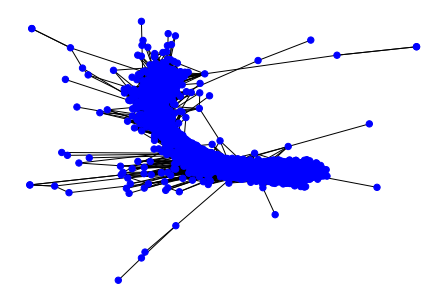

Number of infected nodes:  1


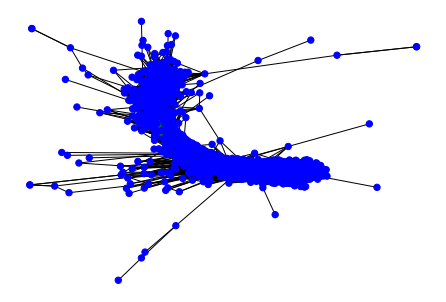

Number of infected nodes:  7


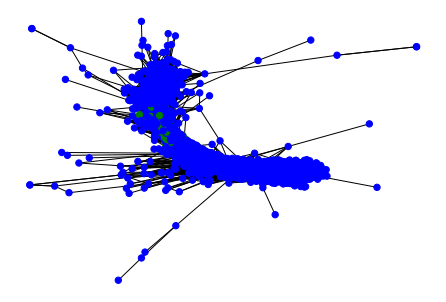

Number of infected nodes:  125


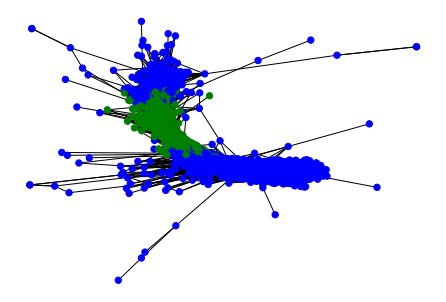

Number of infected nodes:  767


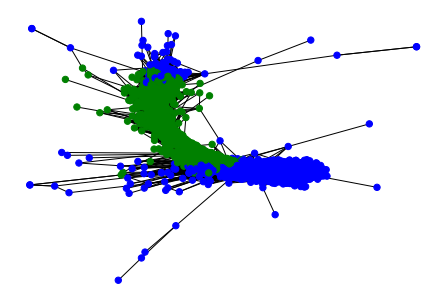

Number of infected nodes:  1527


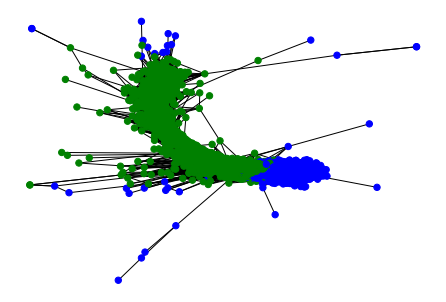

Number of infected nodes:  2954


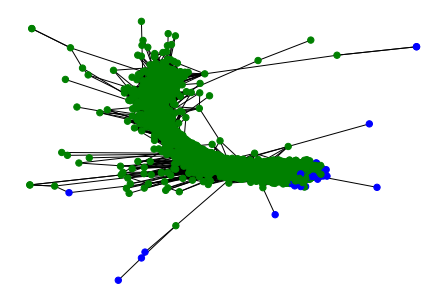

Number of infected nodes:  4756


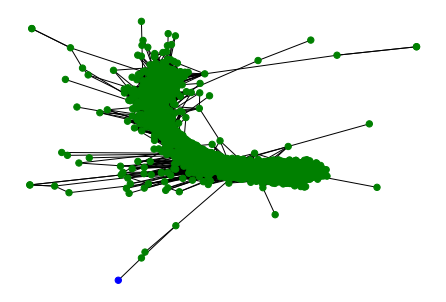

Number of infected nodes:  4799


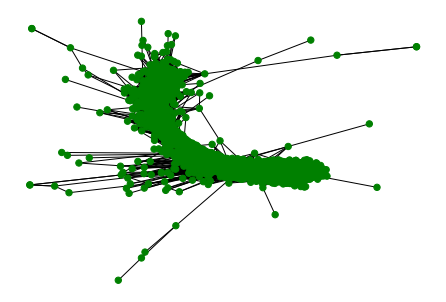

Number of infected nodes:  4800
Every node has been infected


In [19]:
threshold=0.015
infected=initialSetup(1) #argument: number of initially infected nodes
displayColoredGraph(infected)
print("Number of infected nodes: ", len(infected))
for it in range(10):
  if len(infected)==nx.number_of_nodes(G):
    print("Every node has been infected")
    break
  infected=iterateContagion(infected)
  displayColoredGraph(infected)
  print("Number of infected nodes: ", len(infected))

In [0]:
list1=[1,7,125,767,1527,2954,4756,4799,4800]

In [23]:
threshold=0.015
infected= ["Franco Superchi"] #node with most betweenness
list2=[1]
print("Number of infected nodes: ", len(infected))
for it in range(10):
  if len(infected)==nx.number_of_nodes(G):
    print("Every node has been infected")
    break
  infected=iterateContagion(infected)
  list2.append(len(infected))
  print("Number of infected nodes: ", len(infected))

Number of infected nodes:  1
Number of infected nodes:  12
Number of infected nodes:  193
Number of infected nodes:  1153
Number of infected nodes:  2748
Number of infected nodes:  4737
Number of infected nodes:  4794
Number of infected nodes:  4800
Every node has been infected


In [24]:
threshold=0.015
infected= ["Francesco Antonioli"] #node with most closeness
list3=[1]
print("Number of infected nodes: ", len(infected))
for it in range(10):
  if len(infected)==nx.number_of_nodes(G):
    print("Every node has been infected")
    break
  infected=iterateContagion(infected)
  list3.append(len(infected))
  print("Number of infected nodes: ", len(infected))

Number of infected nodes:  1
Number of infected nodes:  12
Number of infected nodes:  100
Number of infected nodes:  1140
Number of infected nodes:  3503
Number of infected nodes:  4282
Number of infected nodes:  4572
Number of infected nodes:  4781
Number of infected nodes:  4795
Number of infected nodes:  4800
Every node has been infected


In [0]:
#getting node with most degree

from operator import itemgetter
degree_sequence = sorted(G.degree(),key=itemgetter(1), reverse=True)  
node_most_degree= degree_sequence[0][0]

In [33]:
threshold=0.015
infected= [node_most_degree] #node with most degree (hub)
list4=[1]
print("Number of infected nodes: ", len(infected))
while(True):
  if len(infected)==nx.number_of_nodes(G):
    print("Every node has been infected")
    break
  infected=iterateContagion(infected)
  list4.append(len(infected))
  print("Number of infected nodes: ", len(infected))

Number of infected nodes:  1
Number of infected nodes:  11
Number of infected nodes:  100
Number of infected nodes:  1227
Number of infected nodes:  3432
Number of infected nodes:  3825
Number of infected nodes:  4138
Number of infected nodes:  4385
Number of infected nodes:  4671
Number of infected nodes:  4785
Number of infected nodes:  4798
Number of infected nodes:  4800
Every node has been infected


In [0]:
steps_per_spreading=[len(list1),len(list2),len(list3),len(list4)]
max_length= max(max(len(list1), len(list2)), len(list3), len(list4))
list1+= [nx.number_of_nodes(G)] * (max_length - len(list1))
list2+= [nx.number_of_nodes(G)] * (max_length - len(list2))
list3+= [nx.number_of_nodes(G)] * (max_length - len(list3))
list3+= [nx.number_of_nodes(G)] * (max_length - len(list4))


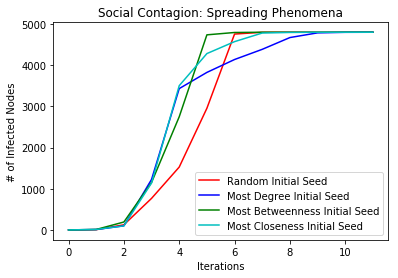

In [37]:
x=range(max_length)
plt.plot(x,list1, '-r',label='Random Initial Seed')
plt.plot(x,list4, '-b',label='Most Degree Initial Seed')
plt.plot(x,list2, '-g', label='Most Betweenness Initial Seed')
plt.plot(x,list3, '-c', label='Most Closeness Initial Seed')

plt.title("Social Contagion: Spreading Phenomena")
plt.xlabel("Iterations")
plt.ylabel("# of Infected Nodes")
plt.legend()
plt.show()